In [118]:
import numpy as np

from numpy.random import dirichlet
from numpy.random import poisson

import matplotlib.pyplot as plt

# import matplotlib colormap
import matplotlib.cm as cm
from matplotlib import colors

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [83]:
def progressive_sum(input_list):
    result = [0]  # Initialize an empty list to store the progressive sums
    current_sum = 0  # Initialize the current sum to 0

    for i in range(len(input_list)):
        current_sum += input_list[i]  # Add the current item to the current sum
        result.append(current_sum)  # Append the current sum to the result list
    return np.array(result)

In [110]:
dirichlet(np.full(4, alpha), 1).sum()

1.0

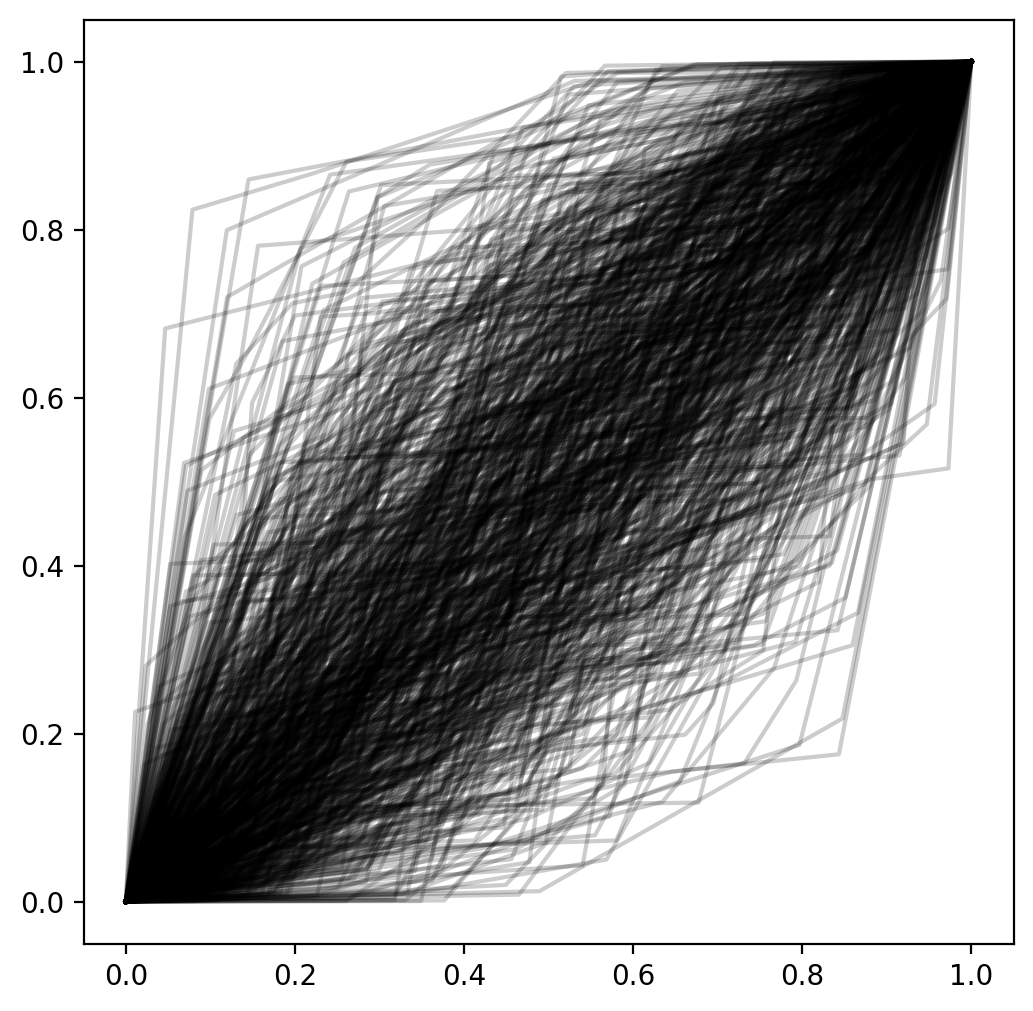

In [115]:
poisson_lambda = np.arange(1, 10, 1)

resample_n = 100

alpha = 4
xs = []
ys = []

plt.figure(figsize=(6,6))
for i in poisson_lambda:
    these_Ns = poisson(i, resample_n)
    these_Ns = [item for item in these_Ns if item > 1]
    # print(these_lambdas)
    for l in these_Ns:
        y_intervals = dirichlet(np.full(l+1, 1), 1)[0]
        x_intervals = dirichlet(np.full(l+1, alpha), 1)[0]

        # print(y_intervals, x_intervals)
        y = progressive_sum(y_intervals)
        x = progressive_sum(x_intervals)

        # ys.append(y)
        # xs.append(x)
        plt.plot(x, y, color='black', alpha=0.2)
# plt.xlim(0, 1)
# plt.ylim(0, 1)


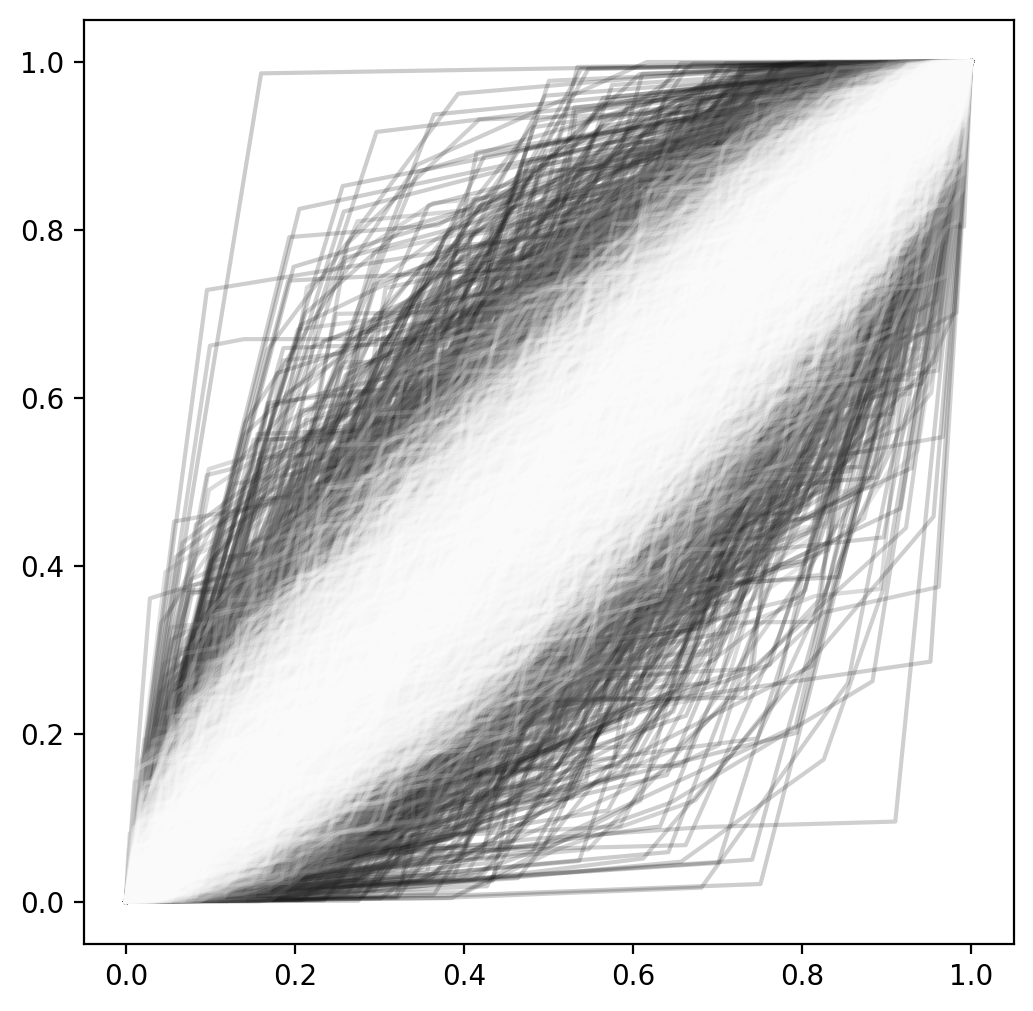

In [125]:
interval_range = range(1, 50)
colormap = plt.cm.Greys_r 

norm = colors.Normalize(vmin=min(interval_range), vmax=max(interval_range))
scalar_map = plt.cm.ScalarMappable(cmap=colormap, norm=norm)

n_resample = 100

plt.figure(figsize=(6,6))
for i in interval_range:
    y_intervals = dirichlet(np.full(i+1, 1), n_resample)
    x_intervals = dirichlet(np.full(i+1, alpha), n_resample)

    this_color = scalar_map.to_rgba(i)

    for j in range(n_resample):
        y = progressive_sum(y_intervals[j])
        x = progressive_sum(x_intervals[j])

        plt.plot(x, y, color=this_color,  alpha=0.2)